1. Завантажити набір даних. Для цього слід використовувати функцію

In [2]:
!wget -O SpamEmailClassificationDataset.zip https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/SpamEmailClassificationDataset.zip?raw=true


--2024-11-04 11:23:02--  https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/SpamEmailClassificationDataset.zip?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/raw/refs/heads/main/SpamEmailClassificationDataset.zip [following]
--2024-11-04 11:23:03--  https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/raw/refs/heads/main/SpamEmailClassificationDataset.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/refs/heads/main/SpamEmailClassificationDataset.zip [following]
--2024-11-04 11:23:03--  https://raw.githubusercontent.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/refs/heads/main/SpamEmailClassificationDataset.zip
Res

2. Розпакувати файл даних функцією

In [3]:
!unzip SpamEmailClassificationDataset.zip


Archive:  SpamEmailClassificationDataset.zip
   creating: SpamEmailClassificationDataset/
  inflating: SpamEmailClassificationDataset/combined_data.csv  


3. У цій роботі нам знадобляться спеціалізовані бібліотеки для обробки текстів.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Завантажимо стоп-слова
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

4. Прочитати дані за допомогою

In [22]:
df = pd.read_csv('SpamEmailClassificationDataset/combined_data.csv')

В оригінальному наборі даних міститься 83448 записів. Отже, для подальшої роботи має сенс відібрати тільки декілька тисяч записів.

In [23]:
df_sample = df.sample(n=5000, random_state=42)

In [24]:
print(f"Розмір вибірки для подальшої роботи: {df_sample.shape}")
df_sample.head()

Розмір вибірки для подальшої роботи: (5000, 2)


,label,text
2183,1,while we may have high expectations of our ass...
13282,0,"sorry ,\ndon ' t we need to know the cost , as..."
3921,0,paul received the standard business reorg pack...
10590,0,mathew 写道 what does gr do it's qr not gr see p...
3193,0,croero hotmail com wrote hello i need to impo...


In [27]:
ham_df = df_sample[df_sample['label'] == '0'].sample(100)

In [28]:
spam_df = df_sample[df_sample['label'] == '1'].sample(100)
test_df = pd.concat([ham_df.iloc[90:100], spam_df.iloc[90:100]])

sampled_df = pd.concat([ham_df, spam_df]).sample(frac = 1)
sampled_df

,label,text
8094,0,oats oats variety in c victory golden rain or ...
1206,0,can you make it negative ? we need to reduce o...
7799,1,seize your opportunity  anatrim  the very up...
3048,1,confirmation escapenumber escapenumber http pl...
14047,1,autumnal firefly perfidy searchlight societe w...
...,...,...
5553,0,i'm sorry that this question has been asked be...
708,0,on tue escapenumber escapenumber escapenumber ...
13708,1,good day\nwe are now embarking on a massive ad...
4590,0,schwab's statement from http www ustr gov docu...


In [29]:
hue_df = ham_df.iloc[:90]
spam_df = spam_df.iloc[:90]

for dis in [hue_df,
            spam_df,
            test_df]:
    display(dis.head(3))
    display(dis.info())
    print('-' * 20)

,label,text
1883,0,april escapenumber escapenumber home u s world...
9796,0,"louise , i met with all the non - commercial b..."
937,0,thursday escapenumber escapenumber escapenumbe...


<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 1883 to 12018
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   90 non-null     object
 1   text    90 non-null     object
dtypes: object(2)
memory usage: 2.1+ KB


None

--------------------


,label,text
11980,1,rugs bags and books but still devoted still sm...
7975,1,best buy check on the site viagra escapenumber...
79,1,bought affect certain fire science proud side ...


<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 11980 to 8098
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   90 non-null     object
 1   text    90 non-null     object
dtypes: object(2)
memory usage: 2.1+ KB


None

--------------------


,label,text
3260,0,dear list http www teachingcommons ca is only ...
2477,0,revno escapenumber revision id tridge samba o...
12150,0,thanks muchly that fixed the problem roy m on ...


<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 3260 to 13033
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   20 non-null     object
 1   text    20 non-null     object
dtypes: object(2)
memory usage: 480.0+ bytes


None

--------------------


5. Візуалізувати розподіл повідомлень за двома класами у вигляді гістограми або Pie Chart. Краще, якщо вибірка даних буде містити майже рівну кількість повідомлень обох класів.

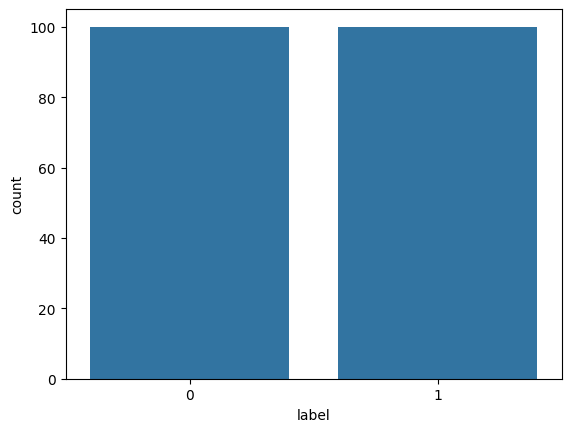

In [30]:
sns.countplot(x="label", data=sampled_df)
plt.show()

6. Застосувати методи обробки тексту бібліотеки nltk для перетворення текстів: приведення до нижнього регістру, приведення слів до словникової форми, видалення повторів слів у повідомленні.

In [47]:
from nltk.stem import WordNetLemmatizer
corpus = []
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

for document in sampled_df["text"]:
    document = re.sub("[^a-zA-Z]", " ", document).lower()
    document = document.split()
    document = [lemmatizer.lemmatize(word) for word in document if word not in stop_words]
    # print(document)
    document = list(set(document))
    document = " ".join(document)
    corpus.append(document)

sampled_df["text"] = corpus
hue_df = sampled_df[sampled_df['label'] == '0']
spam_df = sampled_df[sampled_df['label'] == '1']

corpus = []
for document in test_df["text"]:
    document = re.sub("[^a-zA-Z]", " ", document).lower()
    document = document.split()
    document = [lemmatizer.lemmatize(word) for word in document if word not in stop_words]
    # print(document)
    document = list(set(document))
    document = " ".join(document)
    corpus.append(document)

test_df["text"] = corpus

In [48]:
hue_df

,label,text
8094,0,subset commented escapenumber sur list mailto ...
1206,0,finally sept heard fee pm j spreadsheet done p...
8187,0,happen literal point opposite exists state hop...
3269,0,revision state escapenumber segfault transport...
5576,0,kimberly tk participate bidding ha told mary f...
...,...,...
10511,0,c reading usually www point commented decimal ...
2117,0,definable escapenumber regex dom type name hth...
5553,0,att commented hint list stat dist reproducible...
708,0,access leading irc escapenumber ok size fd fio...


In [49]:
spam_df


,label,text
7799,1,nothing revolutionary action escapenumber feel...
3048,1,attempt speedy announcement follows meet confi...
14047,1,get wireman promotional firefly look eight nam...
11604,1,nothing discovered honest joy peasant girl shu...
12947,1,aggresive hawk like look cdyv escapenumber con...
...,...,...
13335,1,science nothing leading taking escapenumber pa...
12202,1,woman morning child escapenumber sight f click...
7169,1,worldwide chaaange like right shipping viiiiia...
13708,1,promotional journal look hear removal massive ...


7. Підготувати структури даних train_spam, train_ham, test_emails, які будуть містити повідомлення spam для тренування, повідомлення ham для тренування та словник тестових повідомлень. Приклад цих структур даних наведено в конспекті.

In [50]:
# make a vocabulary of unique words that occur in known spam emails

vocab_words_spam = []

for sentence in spam_df['text']:
    sentence_as_list = sentence.split()
    for word in sentence_as_list:
        vocab_words_spam.append(word)

print(vocab_words_spam)


['nothing', 'revolutionary', 'action', 'escapenumber', 'feel', 'association', 'click', 'thousand', 'slimmer', 'wa', 'girl', 'tremendous', 'quality', 'product', 'last', 'take', 'service', 'terrible', 'swallowing', 'private', 'opportunity', 'invincible', 'inspect', 'linda', 'seen', 'need', 'saved', 'outstanding', 'much', 'rid', 'situation', 'delighted', 'valuable', 'boston', 'number', 'f', 'since', 'shall', 'strong', 'bellevue', 'getting', 'join', 'track', 'com', 'effect', 'till', 'anything', 'time', 'keep', 'disclosed', 'great', 'back', 'enjoying', 'never', 'earth', 'health', 'www', 'customer', 'svelte', 'like', 'top', 'look', 'achieve', 'oprah', 'determined', 'long', 'le', 'worldwide', 'compare', 'mode', 'plenty', 'recall', 'write', 'people', 'offering', 'always', 'worn', 'careful', 'shaking', 'better', 'mikkey', 'date', 'escapelong', 'life', 'obese', 'asked', 'quashted', 'healthier', 'insanity', 'gladness', 'necessary', 'happily', 'even', 'exciting', 'proud', 'seize', 'degree', 'said'

In [51]:
vocab_unique_words_spam = list(set(vocab_words_spam))
print(vocab_unique_words_spam)

['wireman', 'gervasio', 'equity', 'speciaiizes', 'paliourg', 'distinguished', 'progress', 'london', 'uitr', 'e', 'maximum', 'try', 'mepas', 'mangu', 'decide', 'visitas', 'accuracy', 'dolan', 'obvious', 'pump', 'lsf', 'cheapest', 'actualize', 'left', 'southeast', 'hi', 'tragamonedas', 'congress', 'pe', 'brocker', 'oxley', 'last', 'sumbescapenumberl', 'calif', 'reliabie', 'expanding', 'impotence', 'cc', 'vip', 'rest', 'caffeine', 'partnered', 'gathering', 'construed', 'weekly', 'clearly', 'xescapenumber', 'proved', 'able', 'meaning', 'considering', 'escapenumberth', 'need', 'chief', 'ensuring', 'iphone', 'octoplus', 'escapenumberxx', 'god', 'british', 'release', 'wrongfuily', 'renew', 'kindness', 'rank', 'rebate', 'terminal', 'ae', 'still', 'withstand', 'mobile', 'dog', 'vi', 'visiting', 'dip', 'title', 'amanuensis', 'satisfy', 'dia', 'large', 'pubiic', 'share', 'photo', 'depth', 'contacted', 'advancement', 'learn', 'andwas', 'quadrupie', 'control', 'bitten', 'half', 'duty', 'short', 'im

In [52]:
dict_spamicity = {}
for w in vocab_unique_words_spam:
    emails_with_w = 0     # counter
    for sentence in spam_df['text']:
        if w in sentence:
            emails_with_w+=1

    # print(f"Number of spam emails with the word '{w}': {emails_with_w}")
    total_spam = len(spam_df['text'])
    spamicity = (emails_with_w+1)/(total_spam+2)
    # print(f"Spamicity of the word '{w}': {spamicity} \n")
    dict_spamicity[w.lower()] = spamicity

In [53]:
# make a vocabulary of unique words that occur in known ham emails
vocab_words_ham = []
for sentence in ham_df['text']:
    sentence_as_list = sentence.split()
    for word in sentence_as_list:
        vocab_words_ham.append(word)

vocab_unique_words_ham = list(set(vocab_words_ham))
print(vocab_unique_words_ham)

['dents', 'london', 'e', 'try', 'obvious', 'votes', 'ditches', 'gathering', 'weekly', 'dugout', 'stuck', 'comparisons', 'gd', 'davis', 'tue', 'gmodels', 'were', 'approximate', 'ae', 'netbiosname', 'reflect', '78232', 'incorrect', 'mobile', 'wap', 'southbridge', 'funny', 'title', "'escapenumber", 'dynixptx', 'optimize', 'control', 'hills', 'created', 'ramboando', 'short', 'py', 'mon', 'popular', 'must', 'hideunread', 'collier', 'broadcasts', 'sheila', 'compile', 'automation', 'oasisblockl', 'fact', "haven't", "'cus", 'qantas', 'credit', 'cables', 'suggested', 'encourage', 'replace', 'results', 'database', 'our', 'players', 'center', 'dr', 'freed', 'pulled', 'is', 'assoc', 'oe', 'attached', 'dnaseescapenumber', 'status', 'davecb', 'rooming', 'syslog', 'released', 'widely', 'gettelepathyhandles', 'there', 'monte', 'this', 'tp', 'them', 'analyse', 'wear', 'perhaps', 'pigging', 'extract', 'parrot', 'expensive', 'pigs', 'answerable', 'il', 'spectacular', 'newsletter', '5155', 'naming', 'rece

In [54]:
dict_hamicity = {}
for w in vocab_unique_words_ham:
    emails_with_w = 0     # counter
    for sentence in ham_df['text']:
        if w in sentence:
            # print(w+":", sentence)
            emails_with_w+=1

    # print(f"Number of ham emails with the word '{w}': {emails_with_w}")
    total_ham = len(ham_df['text'])
    Hamicity = (emails_with_w+1)/(total_ham+2)       # Smoothing applied
    # print(f"Hamicity of the word '{w}': {Hamicity} ")
    dict_hamicity[w.lower()] = Hamicity
                                         # Use built-in lower() to keep all words lower case - useful later when
                                         # comparing spamicity vs hamicity of a single word - e.g. 'Your' and
                                         # 'your' will be treated as 2 different words if not normalized to lower                                          # case.

# print(dict_hamicity)

In [55]:
prob_spam = len(spam_df['text']) / (len(spam_df['text'])+(len(ham_df['text'])))
print(prob_spam)

0.5


In [56]:
prob_ham = len(ham_df['text']) / (len(spam_df['text'])+(len(ham_df['text'])))
print(prob_ham)

0.5


In [58]:
test_df[test_df['label'] == '0']['text']

,text
3260,stuff point alike naming small course p home h...
2477,revision escapenumber p tridge callback latenc...
12150,science access getcoverage commented escapenum...
10701,subset state hope escapenumber output commente...
1180,sunday business please kind article regard att...
8928,escapenumberc get channel error index xid shel...
4590,binding www health index matter edition govern...
5868,word realize preclude gpl listmaster contact l...
12573,get davidfilmer like ask owen escapenumber pcu...
708,access leading irc escapenumber ok size fd fio...


In [59]:
test_df[test_df['label'] == '1']['text'].to_list()

['get diploma book increased call number assured bachelor admiration phd money master interview confidentiality week benefit one come hour today power earning class prosperous mba required respect university turned doctorate future want day test receive',
 'enable access action disclaimer e peer identifying audit accuracy completion thousand subscriber advisor oxley segment calif litigation acceptance partnered certain construed similar outcome according uncertainty meaning need ensuring involves looking complete release price september mobile interest protect factor position number urge since assembled provider differ national short created report providing anticipates referenced gem expectation historical delivery growing must reader demand publisher never stockholder wholly dollar fact w might occur achieve worldwide term contained mailing given factual build resulting financial press today indicative hot offering present incoming spelled conflict newly shareholder strategic focus n

In [61]:
reduced_sentences_spam_test = []
for sentence in test_df[test_df['label'] == '1']['text'].to_list():
    words_ = []
    for word in sentence.split():
        # print(word)
        if word in vocab_unique_words_spam:
            print(f"'{word}', ok")
            words_.append(word)
        elif word in vocab_unique_words_ham:
            print(f"'{word}', ok")
            words_.append(word)
        else:
            print(f"'{word}', word not present in labelled spam training data")
    reduced_sentences_spam_test.append(words_)
print(reduced_sentences_spam_test)

reduced_sentences_ham_test = []                   # repeat for ham words
for sentence in test_df[test_df['label'] == '0']['text']:
    words_ = []
    for word in sentence.split():
        if word in vocab_unique_words_ham:
            print(f"'{word}', ok")
            words_.append(word)
        elif word in vocab_unique_words_spam:
            print(f"'{word}', ok")
            words_.append(word)
        else:
            print(f"'{word}', word not present in labelled ham training data")
    reduced_sentences_ham_test.append(words_)
print(reduced_sentences_ham_test)


'get', ok
'diploma', ok
'book', ok
'increased', ok
'call', ok
'number', ok
'assured', ok
'bachelor', ok
'admiration', ok
'phd', ok
'money', ok
'master', ok
'interview', ok
'confidentiality', ok
'week', ok
'benefit', ok
'one', ok
'come', ok
'hour', ok
'today', ok
'power', ok
'earning', ok
'class', ok
'prosperous', ok
'mba', ok
'required', ok
'respect', ok
'university', ok
'turned', ok
'doctorate', ok
'future', ok
'want', ok
'day', ok
'test', ok
'receive', ok
'enable', ok
'access', ok
'action', ok
'disclaimer', ok
'e', ok
'peer', ok
'identifying', ok
'audit', ok
'accuracy', ok
'completion', ok
'thousand', ok
'subscriber', ok
'advisor', ok
'oxley', ok
'segment', ok
'calif', ok
'litigation', ok
'acceptance', ok
'partnered', ok
'certain', ok
'construed', ok
'similar', ok
'outcome', ok
'according', ok
'uncertainty', ok
'meaning', ok
'need', ok
'ensuring', ok
'involves', ok
'looking', ok
'complete', ok
'release', ok
'price', ok
'september', ok
'mobile', ok
'interest', ok
'protect', ok
'factor

In [62]:
test_spam_stemmed = []
non_key = ['us',  'the', 'of','your']       # non-key words, gathered from spam,ham and test sentences
for email in reduced_sentences_spam_test:
    email_stemmed=[]
    for word in email:
        if word in non_key:
            print('remove')
        else:
            email_stemmed.append(word)
    test_spam_stemmed.append(email_stemmed)

print(len(test_spam_stemmed))

test_ham_stemmed = []
non_key = ['us',  'the', 'of', 'your']
for email in reduced_sentences_ham_test:
    email_stemmed=[]
    for word in email:
        if word in non_key:
            print('remove')
        else:
            email_stemmed.append(word)
    test_ham_stemmed.append(email_stemmed)

print(len(test_ham_stemmed))

10
10


8. Застосувати наведену в конспекті реалізацію алгоритму наївного Баєса.

In [63]:
def mult(list_) :        # function to multiply all word probs together
    total_prob = 1
    for i in list_:
         total_prob = total_prob * i
    return total_prob


train_ham = ham_df['text']
train_spam = spam_df['text']

def Bayes(email):
    probs_s = []
    probs_h = []
    for word in email.split():

        Pr_S = len(train_spam) / (len(train_spam) + len(train_ham))
        try:
            pr_WS = sum(email.count(word) for email in train_spam) / sum(len(email.split()) for email in train_spam)
        except ZeroDivisionError:
            pr_WS = 0

        Pr_H = len(train_ham) / (len(train_spam) + len(train_ham))
        try:
            pr_WH = sum(email.count(word) for email in train_ham) / sum(len(email.split()) for email in train_ham)
        except ZeroDivisionError:
            pr_WH = 0

        probs_s.append(pr_WS)
        probs_h.append(pr_WH)

    try:
        final_classification = (Pr_S * mult(probs_s)) / ((Pr_S * mult(probs_s)) + (Pr_H * mult(probs_h)))
    except ZeroDivisionError:
        return None

    if final_classification >= 0.5:
        return 'spam'
    else:
        return 'ham'

In [64]:
for email in spam_df['text']:

    print('')
    # print(f"           Testing stemmed SPAM email {email} :")
    # print('                 Test word by word: ')
    all_word_probs = Bayes(email)
    print(all_word_probs)


None

spam

spam

spam

spam

spam

spam

None

None

None

spam

None

spam

spam

spam

spam

spam

spam

spam

spam

spam

spam

spam

spam

None

spam

spam

spam

None

spam

spam

None

spam

spam

spam

None

spam

None

None

spam

spam

spam

None

spam

None

None

spam

spam

spam

None

spam

spam

spam

None

None

spam

spam

None

spam

spam

spam

spam

spam

spam

spam

None

None

spam

spam

spam

spam

spam

spam

spam

spam

None

spam

None

spam

spam

spam

spam

None

None

spam

spam

spam

None

spam

None

None

spam

None

spam

spam

None

spam

spam

spam

spam


In [65]:
result = []

for email in test_df['text']:
    # print('')
    # print(f"           Testing stemmed HAM email {email} :")
    # print('                 Test word by word: ')
    all_word_probs = Bayes(email)
    result.append(all_word_probs)

In [66]:
len(result)

20

In [67]:
test_df['pred_B'] = result

In [68]:
test_df

,label,text,pred_B
3260,0,stuff point alike naming small course p home h...,None
2477,0,revision escapenumber p tridge callback latenc...,None
12150,0,science access getcoverage commented escapenum...,None
10701,0,subset state hope escapenumber output commente...,None
1180,0,sunday business please kind article regard att...,ham
8928,0,escapenumberc get channel error index xid shel...,ham
4590,0,binding www health index matter edition govern...,ham
5868,0,word realize preclude gpl listmaster contact l...,ham
12573,0,get davidfilmer like ask owen escapenumber pcu...,ham
708,0,access leading irc escapenumber ok size fd fio...,ham


9. Проаналізувати якість побудованого класифікатора: які слова мають найбільшу ймовірність зустрітися у спамі?

In [69]:
spam_word_probabilities = {}

for email in spam_df['text']:
    words = re.findall(r'\b\w+\b', email)  # знаходимо всі слова, відкидаючи спеціальні символи та числа
    for word in words:
        spam_word_probabilities[word] = spam_word_probabilities.get(word, 0) + 1

total_spam_words = sum(spam_word_probabilities.values())

for word in spam_word_probabilities:
    spam_word_probabilities[word] /= total_spam_words

top_spam_words = sorted(spam_word_probabilities.items(), key=lambda x: x[1], reverse=True)[:10]

print("Топ 10 слів, які найчастіше зустрічаються у спамі:")
for word, probability in top_spam_words:
    print(f"{word}: {probability*100:.2f}%")

Топ 10 слів, які найчастіше зустрічаються у спамі:
escapenumber: 0.51%
http: 0.43%
u: 0.40%
one: 0.36%
com: 0.34%
price: 0.30%
time: 0.29%
need: 0.27%
day: 0.27%
please: 0.27%


In [70]:
spam_word_probabilities = {}

for email in ham_df['text']:
    words = re.findall(r'\b\w+\b', email)  # знаходимо всі слова, відкидаючи спеціальні символи та числа
    for word in words:
        spam_word_probabilities[word] = spam_word_probabilities.get(word, 0) + 1

total_spam_words = sum(spam_word_probabilities.values())

for word in spam_word_probabilities:
    spam_word_probabilities[word] /= total_spam_words

top_spam_words = sorted(spam_word_probabilities.items(), key=lambda x: x[1], reverse=True)[:10]

print("Топ 10 слів, які найчастіше зустрічаються у спамі:")
for word, probability in top_spam_words:
    print(f"{word}: {probability*100:.2f}%")

Топ 10 слів, які найчастіше зустрічаються у спамі:
escapenumber: 8.37%
the: 2.93%
to: 1.95%
a: 1.23%
and: 1.15%
of: 1.14%
in: 1.09%
i: 0.98%
for: 0.76%
http: 0.72%
